In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import GridSearchCV

### TimeSeriesSplit

In [2]:
# example of time series cross validation
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [3]:
# example of time series cross validation
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [4]:
# example of time series cross validation
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5, max_train_size=2)
print(tscv)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=2, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [1 2] TEST: [3]
TRAIN: [2 3] TEST: [4]
TRAIN: [3 4] TEST: [5]


In [5]:
# example of time series cross validation
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=2, max_train_size=2, test_size=2)
print(tscv)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=2, n_splits=2, test_size=2)
TRAIN: [0 1] TEST: [2 3]
TRAIN: [2 3] TEST: [4 5]


In [6]:
# example of time series cross validation
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=2, max_train_size=2, test_size=2, gap=1)
print(tscv)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=1, max_train_size=2, n_splits=2, test_size=2)
TRAIN: [0] TEST: [2 3]
TRAIN: [1 2] TEST: [4 5]


### Hyperparameter Tuning

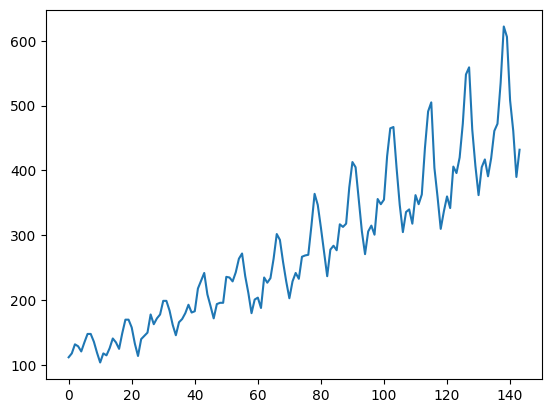

In [7]:
# Read in the data
df = pd.read_csv('airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
# Plot the time series
plt.plot(df['Passengers'])
plt.show()

In [8]:
def hyperparameter_tuning_season_cv(n_splits: int,
                                    gammas: list[float],
                                    df: pd.DataFrame) -> pd.DataFrame:                                   
    """Function to carry out cross-validation hyperparameter tuning
    for the seasonal parameter in a Holt Winters' model. """

    tscv = TimeSeriesSplit(n_splits=n_splits)
    error_list = []

    for gamma in gammas:
    
        errors = []
        
        for train_index, valid_index in tscv.split(df):
            train, valid = df.iloc[train_index], df.iloc[valid_index]
            
            model = ExponentialSmoothing(train['Passengers'], trend='mul',
                                         seasonal='mul', seasonal_periods=12) \
                .fit(smoothing_seasonal=gamma)
                
            forecasts = model.forecast(len(valid))
            errors.append(mean_absolute_percentage_error(valid['Passengers'], forecasts))

        error_list.append([gamma, sum(errors) / len(errors)])

    return pd.DataFrame(error_list, columns=['Gamma', 'MAPE'])

In [9]:
# Carry out cv for hyperparameter tuning for the seasonal parameter
error_df = hyperparameter_tuning_season_cv(df=df,
                                         n_splits=4,
                                         gammas=list(np.arange(0, 1.1, 0.1)))

/Users/lezhang/Documents/learning/repos/venv/genai-venv/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/lezhang/Documents/learning/repos/venv/genai-venv/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/lezhang/Documents/learning/repos/venv/genai-venv/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/lezhang/Documents/learning/repos/venv/genai-venv/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/lezhang/Documents/learning/repos/venv/genai-venv/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/lezhang/Documents/learning/r

In [10]:
error_df

,Gamma,MAPE
0,0.0,0.048897
1,0.1,0.051128
2,0.2,0.052672
3,0.3,0.053538
4,0.4,0.052919
5,0.5,0.047107
6,0.6,0.044867
7,0.7,0.044603
8,0.8,0.046695
9,0.9,0.048922


<BarContainer object of 11 artists>

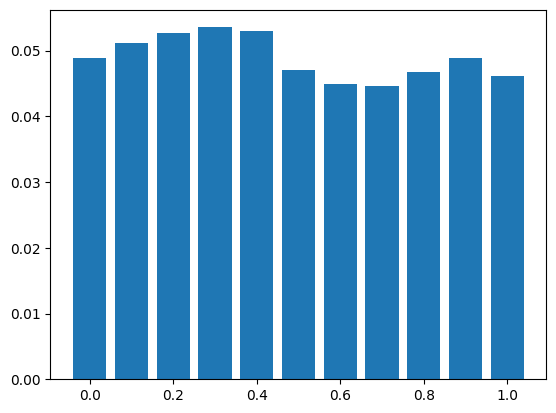

In [11]:
plt.bar(error_df['Gamma'], error_df['MAPE'], width=0.08)